In [47]:
import numpy as np
import tensorflow as tf

In [48]:
#Inputando os dados
inputMatrix = np.array([(100,230,0.95,100),
                        (200,245,0.99,121),
                        ( 40,250,0.91,123)],dtype=float)
outputMatrix = np.array([(120, 5,120),
                         (123,24,100),
                         (154, 3,121)],dtype=float)
for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))

[100.   230.     0.95 100.  ]Input Matrix=[120.   5. 120.]Output Matrix
[200.   245.     0.99 121.  ]Input Matrix=[123.  24. 100.]Output Matrix
[ 40.   250.     0.91 123.  ]Input Matrix=[154.   3. 121.]Output Matrix


In [49]:
#Entrada dos dados: current x, current y, current phi, current v, current theta, goal_pose x, goal_pose y, goal_pose theta, target v
inputMatrix = np.array([(7757517.727,-363656.637,0.025,3.202,-0.251,7757527.998,-363658.752,-0.149,8.55)],dtype=float)

#Saida dos dados: v, phi, t:
outputMatrix = np.array([(3.218,0.025,0.020)],dtype=float)

for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))

[ 7.75751773e+06 -3.63656637e+05  2.50000000e-02  3.20200000e+00
 -2.51000000e-01  7.75752800e+06 -3.63658752e+05 -1.49000000e-01
  8.55000000e+00]Input Matrix=[3.218 0.025 0.02 ]Output Matrix


In [60]:
#Criando o modelo 
l0 = tf.keras.layers.Dense(units = 4, input_shape = [9])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 128)
l3 = tf.keras.layers.Dense(units = 3)

model = tf.keras.Sequential([l0,l1,l2,l3])

In [61]:
#Compilando o modelo
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [62]:
#Treinar o modelo
history = model.fit(inputMatrix,outputMatrix,epochs=500,verbose=False)
print("Finished training the model!")

Finished training the model!


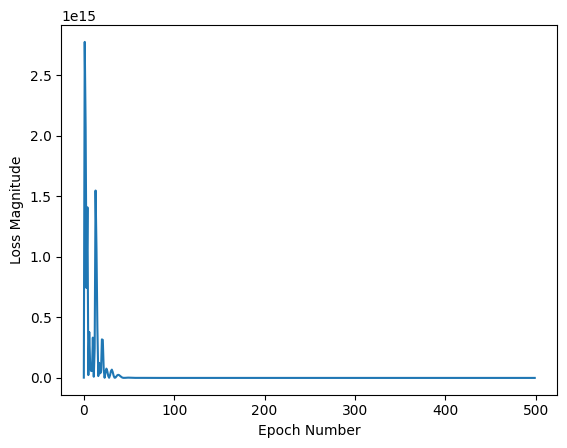

In [63]:
#Exibir estatísticas do treino
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

#Predição do resultado
print(model.predict(np.array([120,260,0.98,110]).reshape(1,4)))


In [65]:
#Predição do resultado (minha nn)
#Entrada dos dados: current x, current y, current phi, current v, current theta, goal_pose x, goal_pose y, goal_pose theta, target v
print(model.predict(np.array([7757517.891,-363656.678,-0.250,3.260,-0.250,7757528.493,-363658.826,-0.144,8.55]).reshape(1,9)))
#predição: (v, phi, t)

1/1 [==============================] - 0s 9ms/step
[[3.3248322  0.19684735 0.29153824]]
